In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import os

In [2]:
train=pd.read_csv("aug_train.csv")
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
numeric_columns = train[['city_development_index', 'target']]  # Select numeric columns
grouped = train[['gender', 'education_level', 'experience', 'company_size']].copy()  # Select grouping columns

# Perform aggregation on numeric columns
agg_result = numeric_columns.groupby([grouped['gender'], grouped['education_level'], 
                                      grouped['experience'], grouped['company_size']]) \
                            .agg(["max", 'mean', "min"])

# Apply background gradient to the aggregated result
styled_agg_result = agg_result.style.background_gradient(cmap="Oranges")

# Display the styled aggregation result
styled_agg_result

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

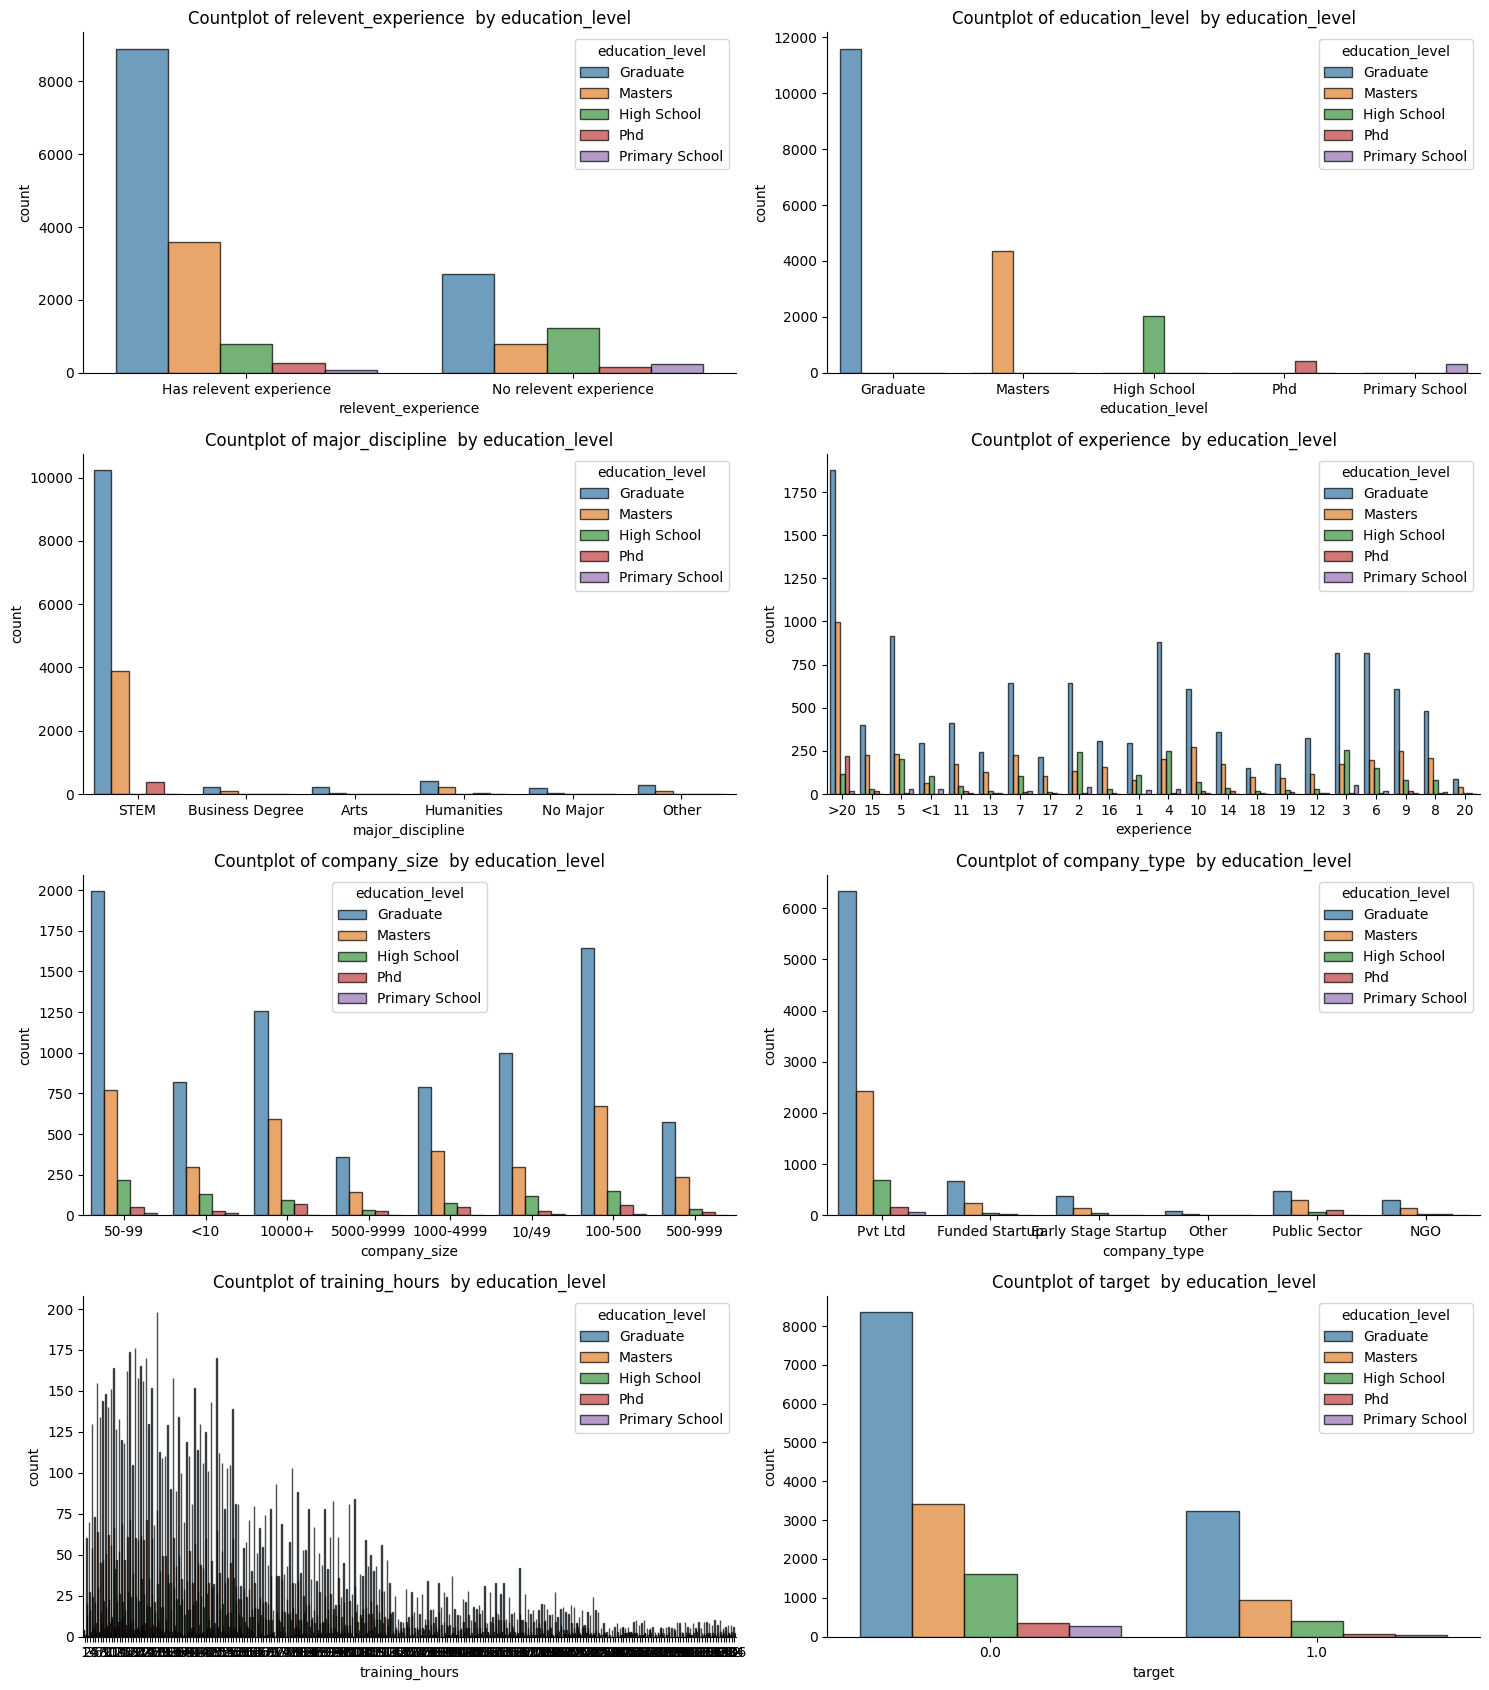

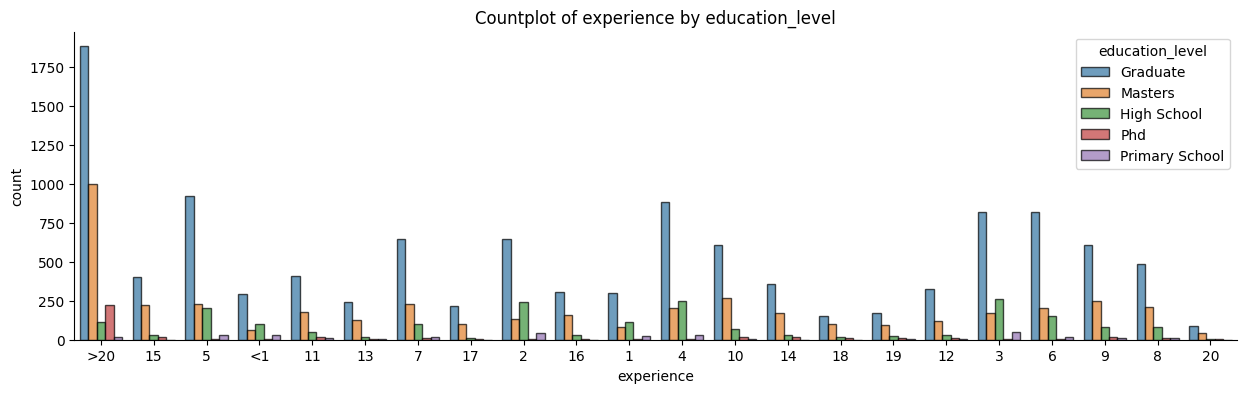

In [5]:
plt.figure(figsize=[15,17])
fft=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type", "training_hours","target"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=train)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='education_level',edgecolor="black", alpha=0.7, data=train)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

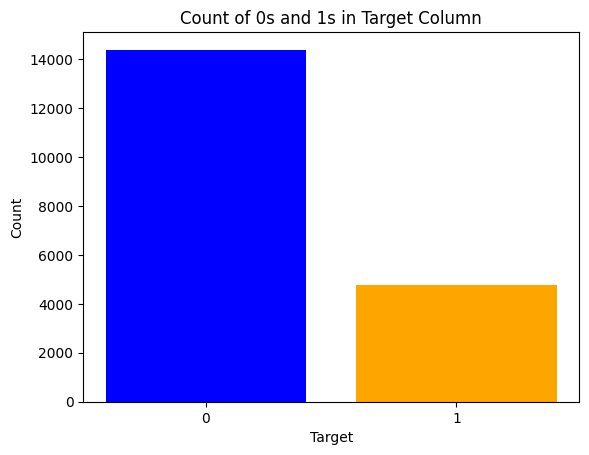

In [6]:
value_counts = train['target'].value_counts()
plt.bar(value_counts.index, value_counts.values, color=['blue', 'orange'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(value_counts.index, labels=['0', '1'])  # Assuming '0' represents one class and '1' represents another class
plt.title('Count of 0s and 1s in Target Column')
plt.show()

from the above bar plot we can analyse that the count of 0's are 3 times the count of 1's.

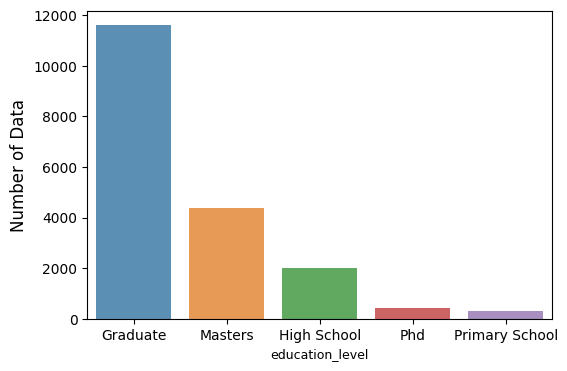

In [7]:
EL = train['education_level'].value_counts()

# Plotting
plt.figure(figsize=(6,4))
sns.barplot(x=EL.index, y=EL.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('education_level', fontsize=9)
plt.show()

In [8]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

el = train['education_level'].value_counts().reset_index()
el.columns = [
    'education_level', 
    'percent'
]
el['percent'] /= len(train)

fig = px.pie(
    el, 
    names='education_level', 
    values='percent', 
    title='Education_level', 
    width=800,
    height=500 
)

fig.show()

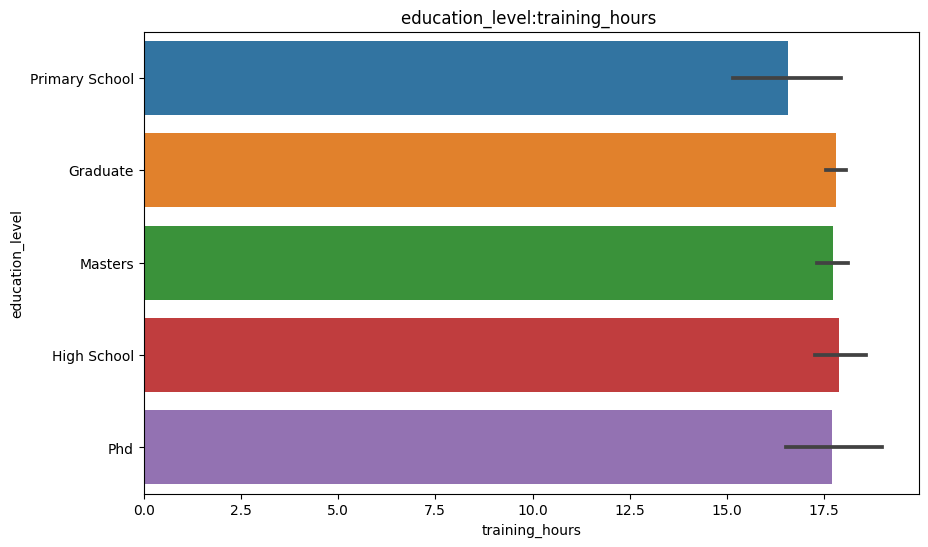

In [9]:
et = train.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=et.education_level, x=et.training_hours)
plt.xticks()
plt.xlabel('training_hours')
plt.ylabel('education_level')
plt.title('education_level:training_hours ')
plt.show()

In [10]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

cd = train['city_development_index'].value_counts().reset_index()
cd.columns = [
    'city_development_index', 
    'count'
]
cd['city_development_index'] = cd['city_development_index'].astype(str) + '-'
cd = cd.sort_values(['count']).tail(50)

fig = px.bar(
    cd, 
    x='count', 
    y='city_development_index', 
    orientation='h', 
    title='Count: City development index', 
    width=1000,
    height=900 
)

fig.show()

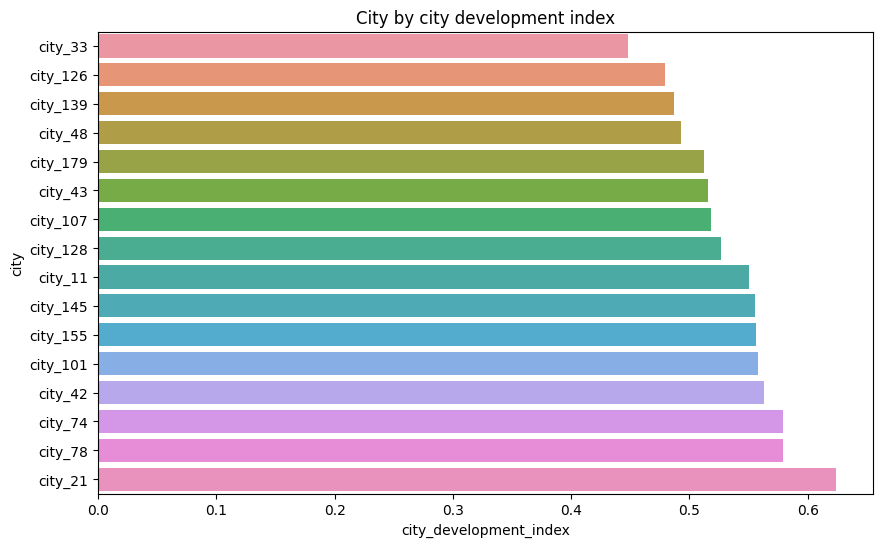

In [11]:
cdi = train.sort_values(by='city_development_index', ascending=True)[:2000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=cdi.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

C:\Users\GREESHMANTH\AppData\Local\Temp\ipykernel_37552\1601749883.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distributional of city_development_index')

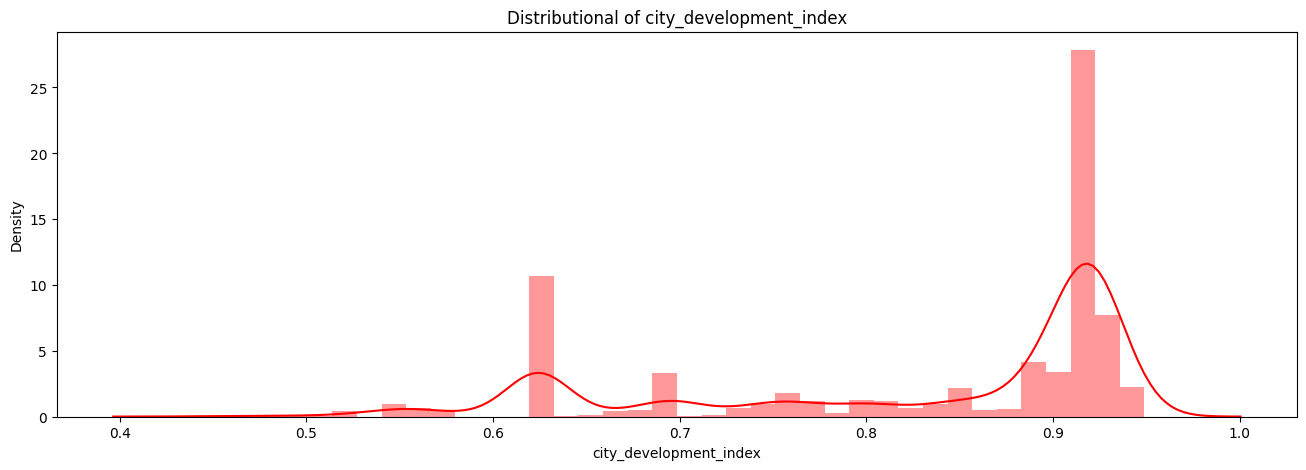

In [12]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(train["city_development_index"], color="red",ax = axes)
plt.title("Distributional of city_development_index")

In [13]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

ep = train['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(train)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience', 
    width=800,
    height=500 
)

fig.show()

C:\Users\GREESHMANTH\AppData\Local\Temp\ipykernel_37552\1282130831.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distributional of training_hours')

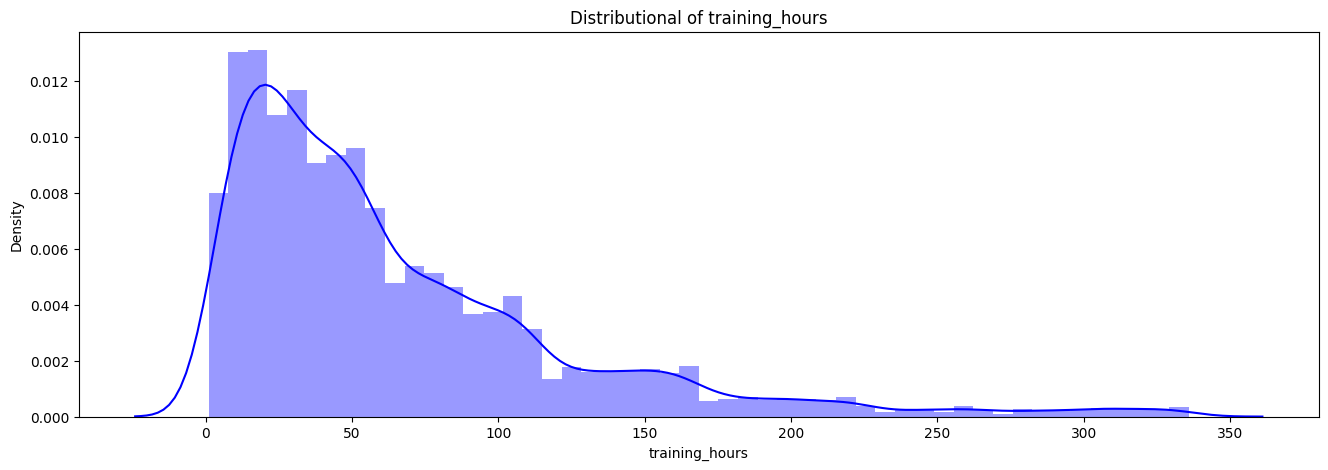

In [14]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(train["training_hours"], color="blue",ax = axes)
plt.title("Distributional of training_hours")

In [15]:
def wmnj(x):
    y = train[["enrollee_id","city","city_development_index","gender","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job","training_hours","target"]][train["education_level"] == x]
    y = y.sort_values(by="enrollee_id",ascending=False)
    return y.head(15)

In [16]:
wmnj("Graduate")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1663,33380,city_83,0.923,Male,No relevent experience,no_enrollment,Graduate,STEM,14,10000+,Pvt Ltd,2,168,0.0
4756,33379,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,<10,Pvt Ltd,2,81,0.0
3351,33377,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,Other,10,100-500,Pvt Ltd,2,27,0.0
17935,33375,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,50-99,Public Sector,1,51,0.0
8842,33368,city_61,0.913,NaN,Has relevent experience,no_enrollment,Graduate,STEM,14,100-500,Pvt Ltd,3,154,0.0
486,33367,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,220,1.0
15902,33365,city_104,0.924,Male,Has relevent experience,no_enrollment,Graduate,STEM,11,<10,Early Stage Startup,1,84,0.0
18439,33362,city_173,0.878,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,10000+,Pvt Ltd,1,100,0.0
2276,33357,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,4,100-500,Pvt Ltd,1,18,0.0
7437,33356,city_90,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,>4,51,0.0


In [17]:
wmnj("Masters")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
5009,33376,city_16,0.910,Female,Has relevent experience,no_enrollment,Masters,Business Degree,8,1000-4999,Public Sector,4,74,0.0
6947,33373,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,100-500,Public Sector,2,34,1.0
2019,33360,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,17,NaN,NaN,>4,65,1.0
802,33358,city_159,0.843,Female,Has relevent experience,no_enrollment,Masters,STEM,7,50-99,Pvt Ltd,1,6,1.0
7530,33348,city_21,0.624,Male,No relevent experience,Part time course,Masters,STEM,15,100-500,Pvt Ltd,never,9,0.0
15711,33325,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Public Sector,1,102,0.0
5475,33307,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,7,100-500,Pvt Ltd,4,45,0.0
11352,33306,city_50,0.896,Male,No relevent experience,Full time course,Masters,STEM,10,NaN,NaN,4,34,1.0
1270,33304,city_106,0.698,Male,Has relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,1,23,1.0
16219,33301,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,14,10/49,NGO,2,268,1.0


In [18]:
wmnj("High School")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
4813,33370,city_114,0.926,Male,No relevent experience,Full time course,High School,NaN,6,NaN,NaN,1,264,0.0
690,33342,city_21,0.624,Male,No relevent experience,Full time course,High School,NaN,5,NaN,Pvt Ltd,never,6,0.0
14491,33341,city_75,0.939,Male,Has relevent experience,Full time course,High School,NaN,6,50-99,Pvt Ltd,1,28,0.0
17390,33335,city_99,0.915,Male,Has relevent experience,no_enrollment,High School,NaN,14,1000-4999,Pvt Ltd,1,6,1.0
8828,33317,city_61,0.913,Male,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,2,258,0.0
14004,33273,city_102,0.804,Male,Has relevent experience,Part time course,High School,NaN,17,50-99,Pvt Ltd,4,20,0.0
12927,33271,city_100,0.887,Male,Has relevent experience,no_enrollment,High School,NaN,>20,NaN,NaN,1,102,1.0
7535,33261,city_160,0.920,Male,No relevent experience,Full time course,High School,NaN,9,NaN,NaN,4,44,1.0
18985,33253,city_41,0.827,Male,Has relevent experience,no_enrollment,High School,NaN,18,NaN,NaN,>4,12,0.0
17876,33249,city_73,0.754,Male,No relevent experience,Part time course,High School,NaN,3,NaN,NaN,1,60,1.0


In [19]:
wmnj("Phd")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
7526,33352,city_16,0.910,Female,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,1,91,0.0
17102,33311,city_136,0.897,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Public Sector,>4,55,0.0
14237,33193,city_114,0.926,Male,No relevent experience,no_enrollment,Phd,STEM,>20,NaN,NaN,>4,24,0.0
16483,32982,city_75,0.939,Male,Has relevent experience,no_enrollment,Phd,STEM,14,<10,Early Stage Startup,1,117,0.0
18458,32716,city_103,0.920,NaN,Has relevent experience,no_enrollment,Phd,STEM,17,50-99,Pvt Ltd,1,336,0.0
11677,32687,city_42,0.563,NaN,Has relevent experience,Full time course,Phd,STEM,<1,NaN,NaN,NaN,43,1.0
1013,32631,city_103,0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,1000-4999,Public Sector,>4,5,1.0
932,32427,city_103,0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,9,1000-4999,Public Sector,1,131,0.0
12557,32251,city_67,0.855,Male,No relevent experience,no_enrollment,Phd,STEM,>20,NaN,Public Sector,>4,99,0.0
3853,32246,city_94,0.698,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,>4,7,0.0


In [20]:
wmnj("Primary School")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
16336,33147,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,NaN,never,198,0.0
7496,32801,city_103,0.920,Other,No relevent experience,no_enrollment,Primary School,NaN,4,NaN,NaN,never,5,0.0
12433,32639,city_160,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,1,NaN,NaN,never,22,0.0
1619,32615,city_160,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,<1,1000-4999,Public Sector,2,85,0.0
11622,32413,city_93,0.865,Male,No relevent experience,no_enrollment,Primary School,NaN,5,50-99,NaN,never,40,0.0
8159,32408,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,5,NaN,Pvt Ltd,never,25,0.0
11928,32357,city_70,0.698,Female,No relevent experience,Full time course,Primary School,NaN,<1,NaN,Pvt Ltd,never,37,1.0
13438,32294,city_103,0.920,Other,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,NaN,never,136,1.0
8415,32277,city_9,0.743,Male,No relevent experience,Part time course,Primary School,NaN,2,<10,Early Stage Startup,never,48,0.0
10064,32238,city_159,0.843,Male,No relevent experience,Full time course,Primary School,NaN,8,NaN,NaN,1,162,0.0


In [21]:
numeric_train = train.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr = numeric_train.corr()["target"]

# Sort correlation values and display
sorted_corr = corr[np.argsort(corr, axis=0)[:-1]]
print(sorted_corr)

city_development_index   -0.341665
training_hours           -0.021577
enrollee_id               0.049475
Name: target, dtype: float64


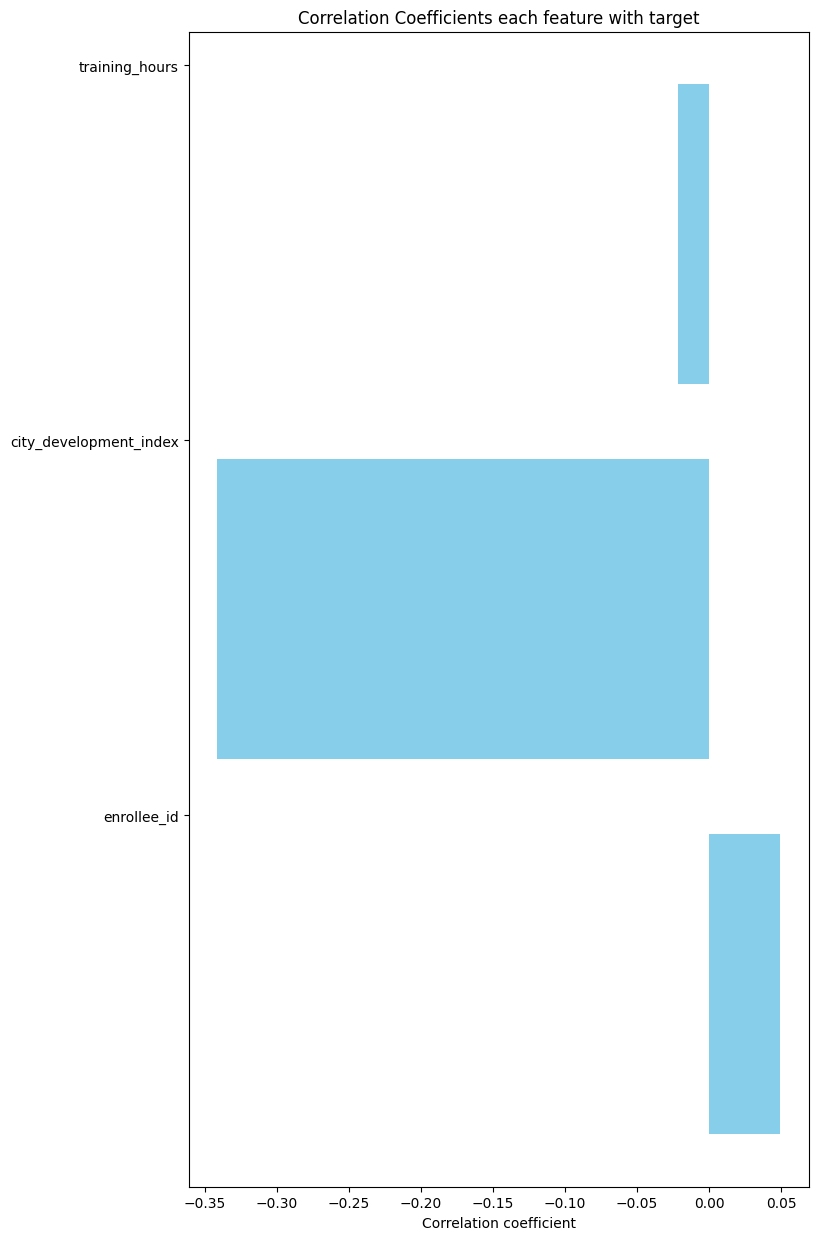

In [22]:
#plotting correlations
num_feat=train.columns[train.dtypes!=object]
num_feat=num_feat [:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.target.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(8,15))
rects = ax.barh(ind, np.array(values), color='skyblue')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients each feature with target");

In [23]:
train['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [24]:
# Creating a function that converts all values of , ['gender'], ['relevent_experience'] , ['enrolled_university'],
# , ['education_level'], ['major_discipline'], ['experience'], ['company_type'],  ['company_size']
# , ['last_new_job'], ['city'] into numbers

def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1 
    if x=='Part time course':   return 2 
    
def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4 
    
def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5 
    
def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4 
    if x=='>4'           :   return 5 
    
def city(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122

In [25]:
train['gender'] = train['gender'].apply(gender_to_numeric)
train['relevent_experience'] = train['relevent_experience'].apply(rel_experience)
train['enrolled_university'] = train['enrolled_university'].apply(enrollment)
train['education_level'] = train['education_level'].apply(edu_level)
train['major_discipline'] = train['major_discipline'].apply(major)
train['experience'] = train['experience'].apply(experience)
train['company_type'] = train['company_type'].apply(company_t)
train['company_size'] = train['company_size'].apply(company_s)
train['last_new_job'] = train['last_new_job'].apply(last_job)
train['city'] = train['city'].apply(city)

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.0,1,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,1,0.776,1.0,0,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0
2,11561,2,0.624,NaN,0,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,3,0.789,NaN,0,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,1.0
4,666,4,0.767,1.0,1,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.0,0,0.0,0.0,3.0,14.0,NaN,NaN,1.0,42,1.0
19154,31398,0,0.920,1.0,1,0.0,0.0,0.0,14.0,NaN,NaN,4.0,52,1.0
19155,24576,0,0.920,1.0,1,0.0,0.0,0.0,21.0,5.0,0.0,4.0,44,0.0
19156,5756,33,0.802,1.0,1,0.0,2.0,NaN,0.0,6.0,0.0,2.0,97,0.0


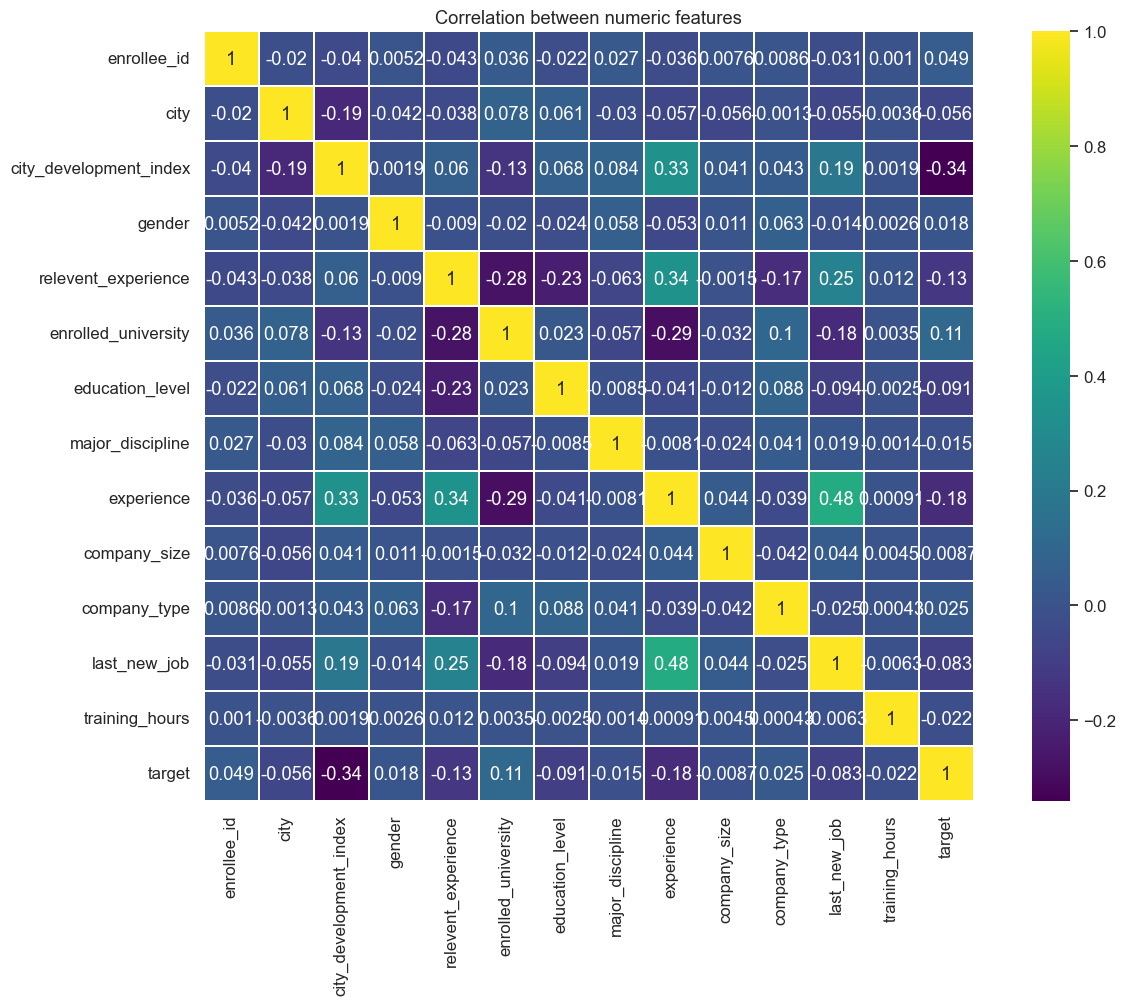

In [26]:
numeric_columns = train.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix for numeric columns
corrMatrix = numeric_columns.corr()

# Plot heatmap
sns.set(font_scale=1.10)
plt.figure(figsize=(15, 10))
sns.heatmap(corrMatrix, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white")
plt.title('Correlation between numeric features')
plt.show()

In [27]:
#missing values

In [28]:
print("Any missing sample in training set:",train.isnull().values.any())

Any missing sample in training set: True


Replace NA values with average

In [29]:
train['gender'] = train['gender'].fillna((train['gender'].mean()))
train['enrolled_university'] = train['enrolled_university'].fillna((train['enrolled_university'].mean()))
train['major_discipline'] = train['major_discipline'].fillna((train['major_discipline'].mean()))
train['company_size'] = train['company_size'].fillna((train['company_size'].mean()))
train['company_type'] = train['company_type'].fillna((train['company_type'].mean()))
train['company_type'] = train['company_type'].fillna((train['company_type'].mean()))

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0
19154,31398,0,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0
19155,24576,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0
19156,5756,33,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0


Testing Data

In [30]:
test= pd.read_csv('aug_test.csv')
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [31]:
test['gender'] = test['gender'].apply(gender_to_numeric)
test['relevent_experience'] = test['relevent_experience'].apply(rel_experience)
test['enrolled_university'] = test['enrolled_university'].apply(enrollment)
test['education_level'] = test['education_level'].apply(edu_level)
test['major_discipline'] = test['major_discipline'].apply(major)
test['experience'] = test['experience'].apply(experience)
test['company_type'] = test['company_type'].apply(company_t)
test['company_size'] = test['company_size'].apply(company_s)
test['last_new_job'] = test['last_new_job'].apply(last_job)
test['city'] = test['city'].apply(city)

test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,24,0.827,1.0,1,1.0,0.0,0.0,9.0,0.0,NaN,1.0,21
1,9858,0,0.920,2.0,1,0.0,0.0,0.0,5.0,NaN,0.0,1.0,98
2,31806,2,0.624,1.0,0,0.0,2.0,NaN,0.0,NaN,0.0,0.0,15
3,27385,10,0.827,1.0,1,0.0,1.0,0.0,11.0,1.0,0.0,1.0,39
4,27724,0,0.920,1.0,1,0.0,0.0,0.0,21.0,4.0,0.0,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0,0.920,1.0,0,0.0,0.0,3.0,16.0,NaN,4.0,4.0,15
2125,195,36,0.897,1.0,1,0.0,1.0,0.0,18.0,NaN,NaN,2.0,30
2126,31762,14,0.887,1.0,0,0.0,4.0,NaN,3.0,NaN,0.0,0.0,18
2127,7873,12,0.804,1.0,1,1.0,2.0,NaN,7.0,2.0,4.0,1.0,84


In [32]:
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in test set: True 



## Replace the missing values with Average of Columns

In [33]:
test['gender'] = test['gender'].fillna((test['gender'].mean()))
test['enrolled_university'] = test['enrolled_university'].fillna((test['enrolled_university'].mean()))
test['major_discipline'] = test['major_discipline'].fillna((test['major_discipline'].mean()))
test['company_size'] = test['company_size'].fillna((test['company_size'].mean()))
test['company_type'] = test['company_type'].fillna((test['company_type'].mean()))
test['company_type'] = test['company_type'].fillna((test['company_type'].mean()))

test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,24,0.827,1.0,1,1.0,0.0,0.000000,9.0,0.000000,0.692977,1.0,21
1,9858,0,0.920,2.0,1,0.0,0.0,0.000000,5.0,3.184472,0.000000,1.0,98
2,31806,2,0.624,1.0,0,0.0,2.0,0.329664,0.0,3.184472,0.000000,0.0,15
3,27385,10,0.827,1.0,1,0.0,1.0,0.000000,11.0,1.000000,0.000000,1.0,39
4,27724,0,0.920,1.0,1,0.0,0.0,0.000000,21.0,4.000000,0.000000,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0,0.920,1.0,0,0.0,0.0,3.000000,16.0,3.184472,4.000000,4.0,15
2125,195,36,0.897,1.0,1,0.0,1.0,0.000000,18.0,3.184472,0.692977,2.0,30
2126,31762,14,0.887,1.0,0,0.0,4.0,0.329664,3.0,3.184472,0.000000,0.0,18
2127,7873,12,0.804,1.0,1,1.0,2.0,0.329664,7.0,2.000000,4.000000,1.0,84


In [34]:
#Select feature column names and target variable we are going to use for training

features =["enrollee_id","city","city_development_index","gender","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job","training_hours"]
target = 'target'

In [35]:
train[features].head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8
5,21651,5,0.764,1.071468,1,2.000000,0.0,0.000000,11.0,3.27466,0.690966,1.0,24
6,28806,6,0.920,1.000000,1,0.000000,2.0,0.344876,5.0,5.00000,1.000000,1.0,24
7,402,7,0.762,1.000000,1,0.000000,0.0,0.000000,13.0,0.00000,0.000000,5.0,18
8,27107,0,0.920,1.000000,1,0.000000,0.0,0.000000,7.0,5.00000,0.000000,1.0,46
9,699,0,0.920,1.071468,1,0.000000,0.0,0.000000,17.0,4.00000,0.000000,5.0,123


In [36]:
train[target].head(100).values

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.])

In [37]:

Y = train['target']
X = train.drop(columns=['target'])


## Filling Missing values with "MEAN"

In [38]:
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer to impute missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train
X_imputed = imputer.fit_transform(X)



In [39]:
Y.value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

### since the data is imbalanced , so to solve the problem by using SMOTE technique.

In [40]:
# pip install imbalanced-Learn

from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')

X_sm,Y_sm=smote.fit_resample(X_imputed,Y)

Y_sm.value_counts()

target
1.0    14381
0.0    14381
Name: count, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=9,stratify=Y_sm)

In [42]:
Y_train.value_counts()

target
1.0    11505
0.0    11504
Name: count, dtype: int64

In [43]:
Y_test.value_counts()

target
0.0    2877
1.0    2876
Name: count, dtype: int64

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression


# Instantiate Logistic Regression model
lr = LogisticRegression()

# Fit the model on the imputed training data
lr.fit(X_train, Y_train)

# Make predictions on the imputed test data
Y_pred_lr = lr.predict(X_test)

print(Y_pred_lr)


[0. 0. 1. ... 1. 1. 1.]


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate accuracy
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print("Accuracy:", accuracy_lr)

precision_lr = precision_score(Y_test, Y_pred_lr)

# Calculate recall
recall_lr = recall_score(Y_test, Y_pred_lr)

# Calculate F1 score
f1_lr = f1_score(Y_test, Y_pred_lr)

print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Accuracy: 0.5763949243872762
Precision: 0.5881880273202089
Recall: 0.5090403337969402
F1 Score: 0.5457595526561044


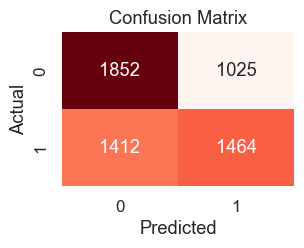

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)

# Plot the heatmap
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

### Navie Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Instantiate the Naive Bayes classifier
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_nb = nb.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

precision_nb = precision_score(Y_test, Y_pred_nb)

# Calculate recall
recall_nb = recall_score(Y_test, Y_pred_nb)

# Calculate F1 score
f1_nb = f1_score(Y_test, Y_pred_nb)

print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

Naive Bayes Accuracy: 0.6601772988006258
Precision: 0.6369313113291704
Recall: 0.7447844228094576
F1 Score: 0.6866485013623977


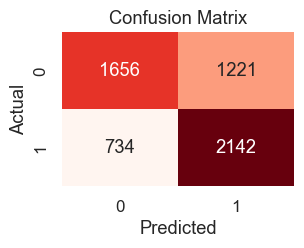

In [49]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_nb)

# Plot the heatmap
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT = DecisionTreeClassifier()

# Train the classifier on the training data
DT.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_DT = DT.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_DT = accuracy_score(Y_test, Y_pred_DT)
print("Accuracy:", accuracy_DT)
precision_DT = precision_score(Y_test, Y_pred_DT)

# Calculate recall
recall_DT = recall_score(Y_test, Y_pred_DT)

# Calculate F1 score
f1_DT = f1_score(Y_test, Y_pred_DT)

print("Precision:", precision_DT)
print("Recall:", recall_DT)
print("F1 Score:", f1_DT)


Accuracy: 0.7908917086737355
Precision: 0.7830795262267344
Recall: 0.8045897079276774
F1 Score: 0.7936889041330817


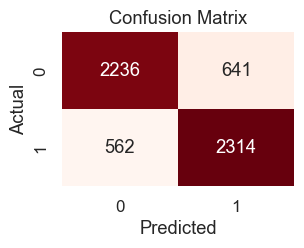

In [51]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_DT)

# Plot the heatmap
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier on the training data
RF.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_RF = RF.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_RF = accuracy_score(Y_test, Y_pred_RF)
print("Accuracy:", accuracy_RF)
precision_RF = precision_score(Y_test, Y_pred_RF)

# Calculate recall
recall_RF = recall_score(Y_test, Y_pred_RF)

# Calculate F1 score
f1_RF = f1_score(Y_test, Y_pred_RF)

print("Precision:", precision_RF)
print("Recall:", recall_RF)
print("F1 Score:", f1_RF)


Accuracy: 0.8515557100643143
Precision: 0.8595305832147937
Recall: 0.8404033379694019
F1 Score: 0.8498593530239099


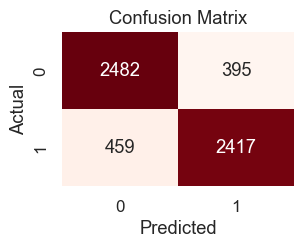

In [54]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_RF)

# Plot the heatmap
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## KNN


In [55]:
from sklearn.neighbors import KNeighborsClassifier

## FOR N=3

In [56]:
k = 3  # Number of neighbors
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_KNN = KNN.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_KNN = accuracy_score(Y_test, Y_pred_KNN)
print("Accuracy:", accuracy_KNN)
precision_KNN = precision_score(Y_test, Y_pred_KNN)

# Calculate recall
recall_KNN = recall_score(Y_test, Y_pred_KNN)

# Calculate F1 score
f1_KNN = f1_score(Y_test, Y_pred_KNN)

print("Precision:", precision_KNN)
print("Recall:", recall_KNN)
print("F1 Score:", f1_KNN)

Accuracy: 0.7156266295845646
Precision: 0.6766381766381766
Recall: 0.8257997218358831
F1 Score: 0.7438145944253053


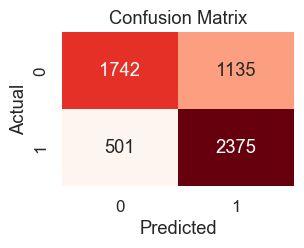

In [57]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_KNN)

# Plot the heatmap
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## FOR N=5

In [58]:
k = 5  # Number of neighbors
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_KNN_2 = KNN.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_KNN_2 = accuracy_score(Y_test, Y_pred_KNN_2)
print("Accuracy:", accuracy_KNN_2)

precision_KNN_2 = precision_score(Y_test, Y_pred_KNN_2)

# Calculate recall
recall_KNN_2 = recall_score(Y_test, Y_pred_KNN_2)

# Calculate F1 score
f1_KNN_2 = f1_score(Y_test, Y_pred_KNN_2)

print("Precision:", precision_KNN_2)
print("Recall:", recall_KNN_2)
print("F1 Score:", f1_KNN_2)

Accuracy: 0.6958108812793325
Precision: 0.6615031554790591
Recall: 0.8018080667593881
F1 Score: 0.7249292675259353


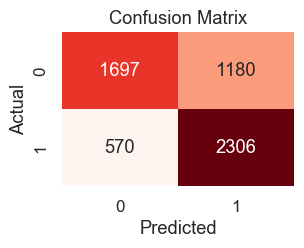

In [59]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_KNN_2)

# Plot the heatmap
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## XGBOOST

In [60]:
import xgboost as xgb

In [61]:
XG = xgb.XGBClassifier(objective='multi:softmax', num_class=3, seed=42)
XG.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_XG = XG.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_XG = accuracy_score(Y_test, Y_pred_XG)
print("Accuracy:", accuracy_XG)

precision_XG = precision_score(Y_test, Y_pred_XG)

# Calculate recall
recall_XG = recall_score(Y_test, Y_pred_XG)

# Calculate F1 score
f1_XG = f1_score(Y_test, Y_pred_XG)

print("Precision:", precision_XG)
print("Recall:", recall_XG)
print("F1 Score:", f1_XG)

Accuracy: 0.8541630453676343
Precision: 0.8678223185265439
Recall: 0.8355354659248957
F1 Score: 0.8513728963684677


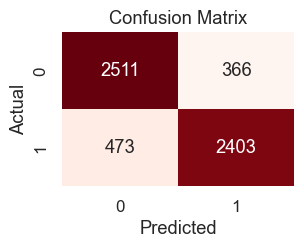

In [62]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_XG)

# Plot the heatmap
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ANN

In [63]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score

In [64]:
num_columns = X_train.shape[1]
print(num_columns)

13


In [65]:
model=keras.Sequential([
    keras.layers.Dense(7,input_shape=(13,),activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')    
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=50)

C:\Users\GREESHMANTH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4950 - loss: 554.9860
Epoch 2/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5200 - loss: 1.8134
Epoch 3/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5282 - loss: 1.8694
Epoch 4/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5276 - loss: 2.1885
Epoch 5/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5323 - loss: 1.9423
Epoch 6/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5405 - loss: 1.5181
Epoch 7/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5324 - loss: 2.1835
Epoch 8/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5370 - loss: 1.8559
Epoch 9/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5409 - loss: 2.1120
Epoch 10/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5362 - loss: 1.6423
Epoch 11/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5410 - loss: 1.4330
Epoch 12/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

In [66]:
Y_pred_ANN=model.predict(X_test)
Y_pred_ANN=(Y_pred_ANN>0.5).astype(int)
accuracy_ANN=accuracy_score(Y_test,Y_pred_ANN)
print('Accuracy',accuracy_ANN)

precision_ANN = precision_score(Y_test, Y_pred_ANN)

# Calculate recall
recall_ANN = recall_score(Y_test, Y_pred_ANN)

# Calculate F1 score
f1_ANN = f1_score(Y_test, Y_pred_ANN)

print("Precision:", precision_ANN)
print("Recall:", recall_ANN)
print("F1 Score:", f1_ANN)

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy 0.6238484269077004
Precision: 0.6001124859392576
Recall: 0.7420027816411683
F1 Score: 0.6635572139303482


for 2 layers {
    epochs : 25-50%,
             50-50.6%,
             75-50%,
             100-50%
}

for 3 layers{
    epochs : 25-50%,
             50-62%,
             75-50%,
             100-50%
}

best is 3 layered , epochs are 50

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


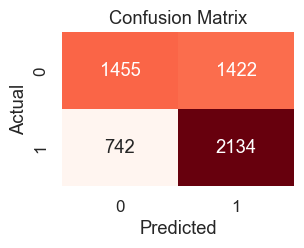

In [67]:
# Predict the probabilities for the test data
Y_pred_ann_prob = model.predict(X_test)

# Convert probabilities to classes based on a threshold (e.g., 0.5)
Y_pred_ann = (Y_pred_ann_prob > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix_ann = confusion_matrix(Y_test, Y_pred_ann)

# Plot the confusion matrix
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix_ann, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



## ADA BOOST


In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
ada_clf.fit(X_train, Y_train)

# Make predictions
y_pred_AD = ada_clf.predict(X_test)

# Calculate accuracy
accuracy_AD = accuracy_score(Y_test, y_pred_AD)

print("Accuracy:", accuracy_AD)

precision_AD = precision_score(Y_test, y_pred_AD)

# Calculate recall
recall_AD = recall_score(Y_test, y_pred_AD)

# Calculate F1 score
f1_AD = f1_score(Y_test, y_pred_AD)

print("Precision:", precision_AD)
print("Recall:", recall_AD)
print("F1 Score:", f1_AD)

Accuracy: 0.8306970276377542
Precision: 0.8506637168141593
Recall: 0.8021557719054242
F1 Score: 0.8256979241231209


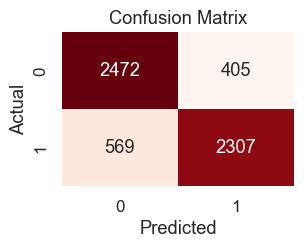

In [69]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_AD)

# Plot the heatmap
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Final output

In [70]:
scores = [accuracy_lr,accuracy_nb,accuracy_DT,accuracy_RF,accuracy_KNN,accuracy_KNN_2,accuracy_XG,accuracy_ANN,accuracy_AD]
algorithms = ["LogisticRegression","Naive Bayes","Decision Tree","Random Forest","KNN(N=3)","KNN(N=5)","XGBoost","ANN","AdaBoostClassifier"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i]*100)+"%")

The accuracy score achieved using LogisticRegression is: 57.63949243872762%
The accuracy score achieved using Naive Bayes is: 66.01772988006257%
The accuracy score achieved using Decision Tree is: 79.08917086737355%
The accuracy score achieved using Random Forest is: 85.15557100643143%
The accuracy score achieved using KNN(N=3) is: 71.56266295845646%
The accuracy score achieved using KNN(N=5) is: 69.58108812793326%
The accuracy score achieved using XGBoost is: 85.41630453676343%
The accuracy score achieved using ANN is: 62.384842690770036%
The accuracy score achieved using AdaBoostClassifier is: 83.06970276377542%


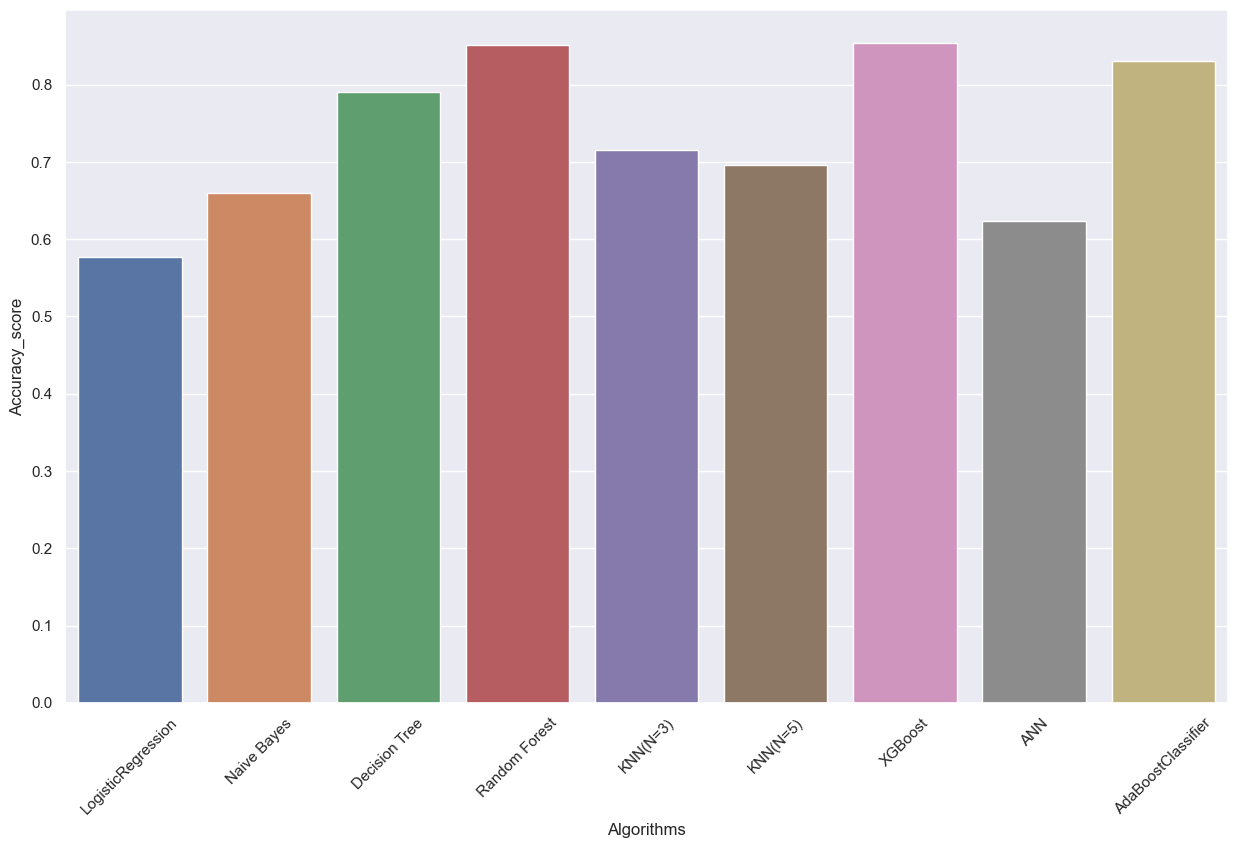

In [71]:
sns.set(rc={'figure.figsize':(15,9)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy_score")
sns.barplot(x=algorithms, y=scores)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
        

In [ ]:
precision=[precision_lr,precision_nb,precision_DT,precision_RF,precision_KNN,precision_KNN_2,precision_XG,precision_ANN,precision_AD]
f1_score=[f1_lr,f1_nb,f1_DT,f1_RF,f1_KNN,f1_KNN_2,f1_XG,f1_ANN,f1_AD]

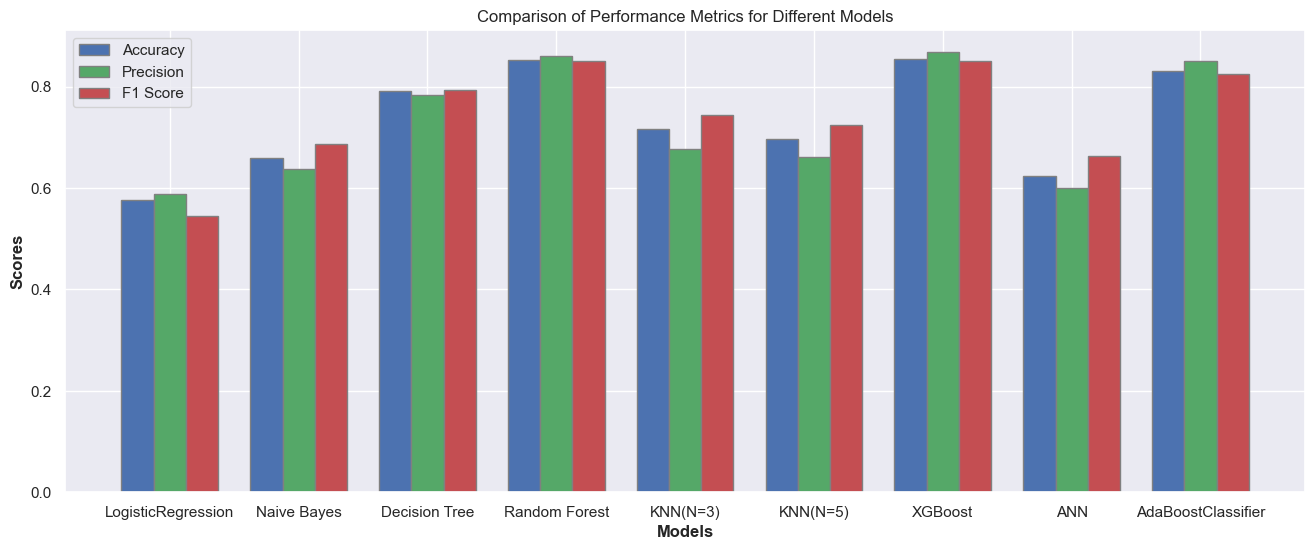

In [77]:
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(16, 6))

plt.bar(r1, scores, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1 Score')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)
plt.title('Comparison of Performance Metrics for Different Models')
plt.legend()
plt.show()

## Random forest have high accuracy compared to others ie.85.3%
###   and 2nd highest accuracy is for XGBoost with 84.9% accuracy 

## Converting into pickel formate

In [73]:
import pickle

In [74]:
filename='model.pkl'
pickle.dump(RF,open(filename,'wb'))